In [55]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [56]:
df = pd.read_csv("../data/flight_data.csv")

df = df.drop(columns=['Unnamed: 0'])
df['departure_time'] = df['departure_time'].replace({
    "Early_Morning": "Early Morning",
    "Late_Night": "Late Night"
})
df['arrival_time'] = df['departure_time'].replace({
    "Early_Morning": "Early Morning",
    "Late_Night": "Late Night"
})
df['airline'] = df['airline'].replace({
    "GO_FIRST": "GO FIRST",
})
df['stops'] = df['stops'].replace({
    "zero": "0",
    "one": "1",
    "two_or_more": ">2",
})

df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Evening,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early Morning,0,Early Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early Morning,0,Early Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Morning,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,1,Morning,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,1,Afternoon,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early Morning,1,Early Morning,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early Morning,1,Early Morning,Hyderabad,Business,10.00,49,81585


Text(0, 0.5, 'Cities')

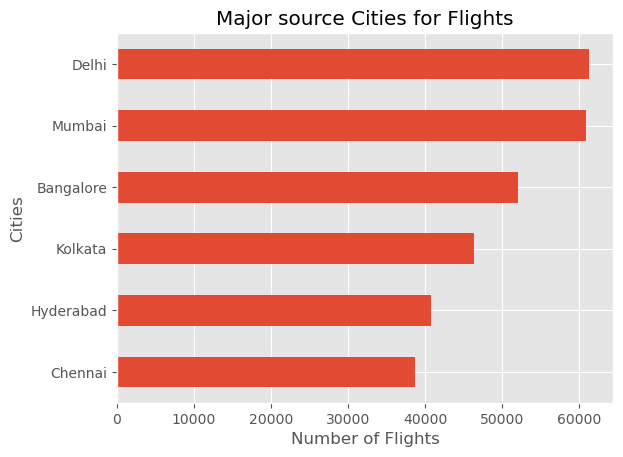

In [57]:
ax = df['source_city'].value_counts(ascending=True) \
                      .plot(kind = 'barh',
                            title = 'Major source Cities for Flights')

ax.set_xlabel('Number of Flights')
ax.set_ylabel('Cities')

Text(0, 0.5, 'Cities')

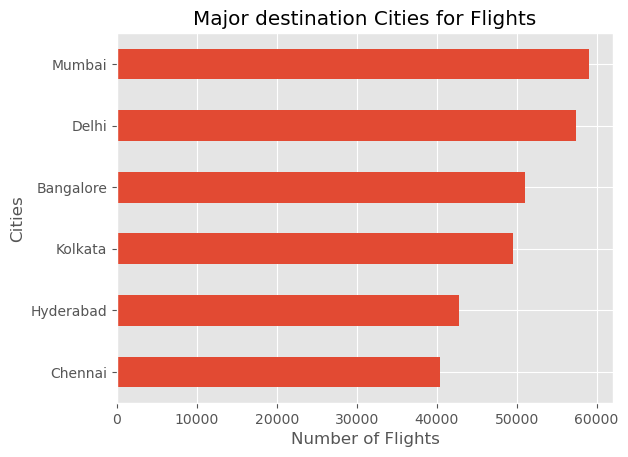

In [58]:
ax = df['destination_city'].value_counts(ascending=True) \
                      .plot(kind = 'barh',
                            title = 'Major destination Cities for Flights')

ax.set_xlabel('Number of Flights')
ax.set_ylabel('Cities')

Text(0, 0.5, 'Airline')

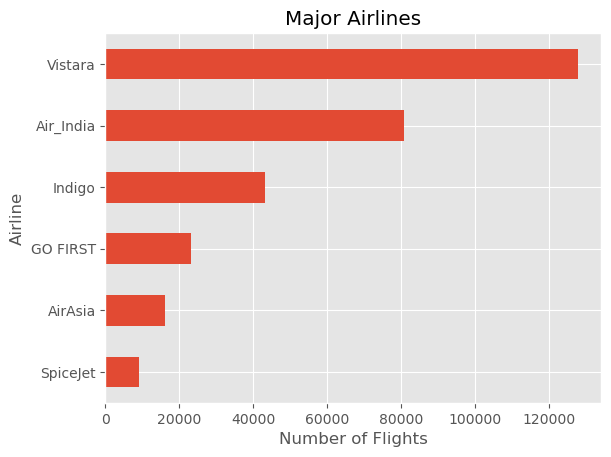

In [59]:
ax = df['airline'].value_counts(ascending=True) \
                  .plot(kind = 'barh', 
                        title = 'Major Airlines')

ax.set_xlabel('Number of Flights')
ax.set_ylabel('Airline')

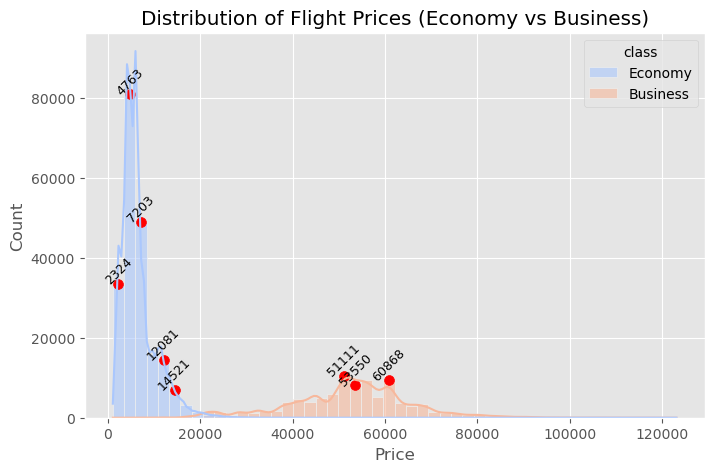

In [60]:
plt.figure(figsize=(8,5))
ax = sns.histplot(df, x="price", hue="class", kde=True, bins=50, palette="coolwarm", alpha=0.6)

bin_heights = np.array([patch.get_height() for patch in ax.patches])
bin_edges = np.array([patch.get_x() for patch in ax.patches])
bin_width = ax.patches[0].get_width()

max_indices = np.argsort(bin_heights)[-10:]
peak_xs = bin_edges[max_indices] + bin_width / 2
peak_ys = bin_heights[max_indices]

# Filter out for better readability
min_distance = bin_width # minimum spacing
filtered_xs, filtered_ys = [], []

for x, y in zip(peak_xs, peak_ys):
    if not filtered_xs or all(abs(x - fx) > min_distance for fx in filtered_xs):
        filtered_xs.append(x)
        filtered_ys.append(y)

# Annotate
for x, y in zip(filtered_xs, filtered_ys):
    plt.text(x, y + 5, f"{int(x)}", ha="center", color="black", fontsize=9, rotation=45)
    plt.scatter(x, y, color="red", s=50, label="Maxima" if x == filtered_xs[0] else "")


plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Flight Prices (Economy vs Business)")
plt.show()

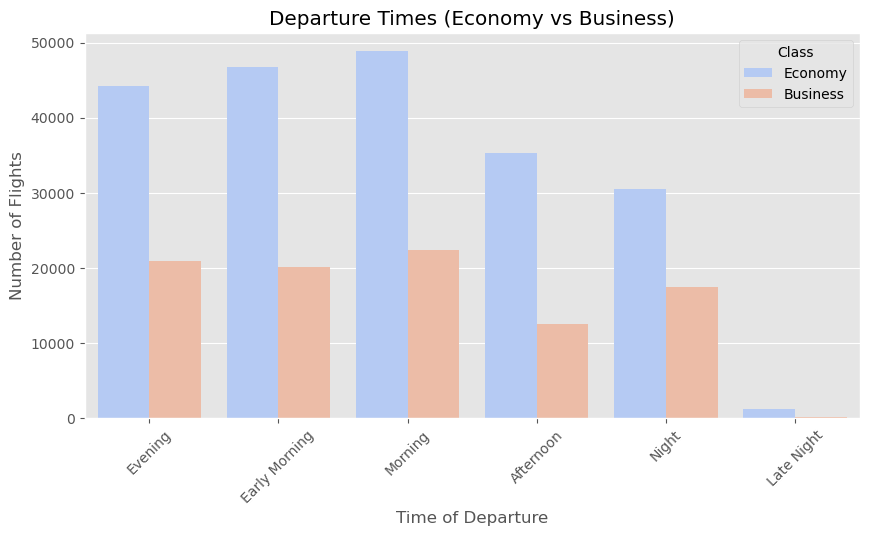

In [61]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="departure_time", hue="class", palette="coolwarm")

plt.xlabel("Time of Departure")
plt.ylabel("Number of Flights")
plt.title("Departure Times (Economy vs Business)")

plt.xticks(rotation=45)
plt.legend(title="Class")
plt.show()

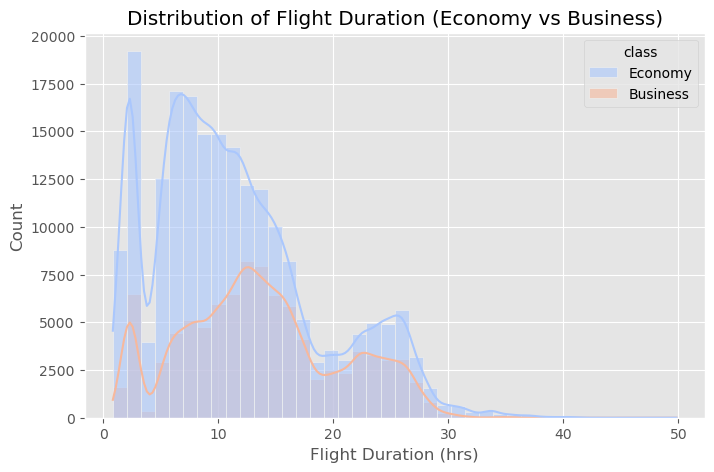

In [62]:
plt.figure(figsize=(8,5))
sns.histplot(df, x="duration", hue="class", kde=True, bins=40, palette="coolwarm", alpha=0.6)
plt.xlabel("Flight Duration (hrs)")
plt.ylabel("Count")
plt.title("Distribution of Flight Duration (Economy vs Business)")
plt.show()

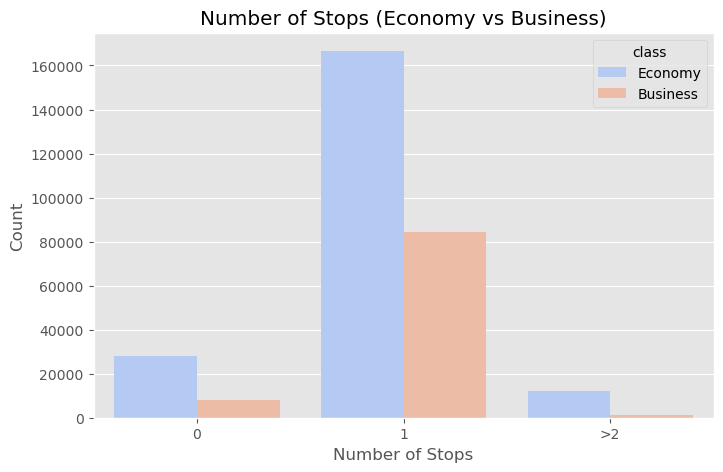

In [63]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["stops"], hue=df["class"], palette="coolwarm")
plt.xlabel("Number of Stops")
plt.ylabel("Count")
plt.title("Number of Stops (Economy vs Business)")
plt.show()